In [6]:
import pandas as pd
import datetime as dt
import footballData as fd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import time
import Elo as ELO
import seaborn as sns

In [7]:
df1888=pd.read_csv('englandthesis.csv')
df1888

/Users/andrewpuopolo/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result
0,1,1888-12-15,1888,Accrington F.C.,Aston Villa,1-1,1,1,1,1,2,0,D
1,2,1889-01-19,1888,Accrington F.C.,Blackburn Rovers,0-2,0,2,1,1,2,-2,A
2,3,1889-03-23,1888,Accrington F.C.,Bolton Wanderers,2-3,2,3,1,1,5,-1,A
3,4,1888-12-01,1888,Accrington F.C.,Burnley,5-1,5,1,1,1,6,4,H
4,5,1888-10-13,1888,Accrington F.C.,Derby County,6-2,6,2,1,1,8,4,H
5,6,1888-12-29,1888,Accrington F.C.,Everton,3-1,3,1,1,1,4,2,H
6,7,1889-01-26,1888,Accrington F.C.,Notts County,1-2,1,2,1,1,3,-1,A
7,8,1888-10-20,1888,Accrington F.C.,Preston North End,0-0,0,0,1,1,0,0,D
8,9,1889-04-20,1888,Accrington F.C.,Stoke City,2-0,2,0,1,1,2,2,H
9,10,1888-11-24,1888,Accrington F.C.,West Bromwich Albion,2-1,2,1,1,1,3,1,H


In [8]:
startdate=1958
fulldf=df1888[df1888['Season']>=startdate]
fulldf=fulldf.sort_values('Date')
fulldf=fulldf.reset_index()
fulldf=fulldf.replace('Milton Keynes Dons', 'Wimbledon')
fulldf

,index,Unnamed: 0,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result
0,75629,75630,1958-08-23,1958,Swindon Town,Wrexham,1-0,1,0,3,3,1,1,H
1,75423,75424,1958-08-23,1958,Notts County,Accrington Stanley,1-1,1,1,3,3,2,0,D
2,75745,75746,1958-08-23,1958,Carlisle United,Aldershot,1-0,1,0,4,4,1,1,H
3,75743,75744,1958-08-23,1958,Bradford Park Avenue,Workington,3-2,3,2,4,4,5,1,H
4,74746,74747,1958-08-23,1958,Cardiff City,Barnsley,0-1,0,1,2,2,1,-1,A
5,75708,75709,1958-08-23,1958,Barrow,Gateshead,0-3,0,3,4,4,3,-3,A
6,74337,74338,1958-08-23,1958,Burnley,Manchester City,3-4,3,4,1,1,7,-1,A
7,74783,74784,1958-08-23,1958,Charlton Athletic,Sheffield United,1-1,1,1,2,2,2,0,D
8,74827,74828,1958-08-23,1958,Fulham,Stoke City,6-1,6,1,2,2,7,5,H
9,75637,75638,1958-08-23,1958,Tranmere Rovers,Doncaster Rovers,3-0,3,0,3,3,3,3,H


In [9]:
def CalendarYear(Date):
    return int(Date.split('-')[0])
CalendarYear(fulldf['Date'][0])
def Month(Date):
    return int(Date.split('-')[1])
fulldf['CalendarYear']=fulldf.apply(lambda row: CalendarYear(row['Date']), axis=1)
fulldf['Month']=fulldf.apply(lambda row: Month(row['Date']), axis=1)

In [10]:
import datetime
from datetime import datetime
def DT(Date):
    return datetime.strptime(Date, '%Y-%m-%d')
fulldf['Date']=fulldf.apply(lambda row: DT(row['Date']), axis=1)

def to_integer(current_time):
    return (current_time-fulldf['Date'][0]).days
fulldf['Day#']=fulldf.apply(lambda row: to_integer(row['Date']), axis=1)
fulldf

,index,Unnamed: 0,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result,CalendarYear,Month,Day#
0,75629,75630,1958-08-23,1958,Swindon Town,Wrexham,1-0,1,0,3,3,1,1,H,1958,8,0
1,75423,75424,1958-08-23,1958,Notts County,Accrington Stanley,1-1,1,1,3,3,2,0,D,1958,8,0
2,75745,75746,1958-08-23,1958,Carlisle United,Aldershot,1-0,1,0,4,4,1,1,H,1958,8,0
3,75743,75744,1958-08-23,1958,Bradford Park Avenue,Workington,3-2,3,2,4,4,5,1,H,1958,8,0
4,74746,74747,1958-08-23,1958,Cardiff City,Barnsley,0-1,0,1,2,2,1,-1,A,1958,8,0
5,75708,75709,1958-08-23,1958,Barrow,Gateshead,0-3,0,3,4,4,3,-3,A,1958,8,0
6,74337,74338,1958-08-23,1958,Burnley,Manchester City,3-4,3,4,1,1,7,-1,A,1958,8,0
7,74783,74784,1958-08-23,1958,Charlton Athletic,Sheffield United,1-1,1,1,2,2,2,0,D,1958,8,0
8,74827,74828,1958-08-23,1958,Fulham,Stoke City,6-1,6,1,2,2,7,5,H,1958,8,0
9,75637,75638,1958-08-23,1958,Tranmere Rovers,Doncaster Rovers,3-0,3,0,3,3,3,3,H,1958,8,0


In [11]:
import time

import copy
#Initializing all teams to be the same, plotting how long it takes to get teams to around the correct point
initdictionary={}
initvalues=[1500,1500,1500,1500]
initialrows=[]
#This needs to be rewritten so we don't have to run it over an dover again
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    initialrow=[Team, Tier]
    initialrows.append(initialrow)
#Needs to be rewritten to optimize using BuildEloDict Function
initdictionary={}
for a in range(len(initialrows)):
    initdictionary[initialrows[a][0]]=[initvalues[initialrows[a][1]-1], initialrows[a][1]]
def E(r, rj, Home):
    return 1/(1+10**(-1*(r-rj+Home)/400))

def Res(HomeG, AwayG):
    if(HomeG>AwayG):
        return 1
    elif(AwayG>HomeG):
        return 0
    else:
        return 0.5

def lik(E, R):
    if(R==1):
        return np.log(E)
    elif (R==.5):
        return np.log(np.sqrt(E*(1-E)))
    elif (R==0):
        return np.log(1-E)
import time


def lik(E, R):
    if(R==1):
        return np.log(E)
    elif (R==.5):
        return np.log(np.sqrt(E*(1-E)))
    elif (R==0):
        return np.log(1-E)
def Eloperiods(params):
    ratingperiodlength=7.0
    k=params['k']
    h=80
    hk=params['hk']
    #minrd=params['minrd']
    curtime=time.time()
    rows=len(fulldf)
    logliks=0.0
    hburn=10
    burn=25
    startyear=fulldf['Season'].values[0]
    startday=fulldf['Season']
    Elodictionary2=copy.deepcopy(initdictionary)
    currentyear=fulldf['Season'].values[0]
    startdate=fulldf['Date'][0]
    GameCounter=0.
    Rs=0.
    Es=0.
    year=copy.deepcopy(startyear)
    totaltime=fulldf['Day#'][rows-1]-fulldf['Day#'][0]
    day=0.
    yeardicts=[]
    while day<=totaltime:
        #print(Elodictionary2)
        ratingperioddf=fulldf[(fulldf['Day#'] >=day) & (fulldf['Day#']<day+ratingperiodlength)].reset_index()
        if len(ratingperioddf!=0):

            Rs=0.
            Es=0.

            for ind, row in ratingperioddf.iterrows():
                if(row['Season']!=year):
                    yeardicts.append([row['Season'], h, copy.deepcopy(Elodictionary2)])
                
                #print('sup')
                Home=row['home']
                Away=row['visitor']
                HomeGoals=row['hgoal']
                AwayGoals=row['vgoal']
                year=row['Season']
                date=row['Date']
                HomeRating=Elodictionary2[Home][0]
                AwayRating=Elodictionary2[Away][0]

                Expect=E(HomeRating, AwayRating, h)
                HRes=Res(HomeGoals, AwayGoals)
                PE=(HRes-Expect)*k
                Elodictionary2[Home][0]=HomeRating+PE
                Elodictionary2[Away][0]=AwayRating-PE
                Rs+=HRes
                Es+=Expect
                if(year>startyear+burn):
                    logliks+=lik(Expect, HRes)
                #print(Home,Away, HomeRating, AwayRating, PE, HRes, HomeGoals, AwayGoals)
                #print(Elodictionary2['Home'], Elodictionary2['Away'], h)
                    
            
            if(year>startyear+hburn):
                h+=hk*(Rs-Es)
        day+=ratingperiodlength
    print(params ,logliks,Elodictionary2['Tottenham Hotspur'], time.time()-curtime)
    #print(Glickodictionary)
    return yeardicts

In [12]:
best={'hk': 0.2742633382088742, 'k': 13.797215454070143}
Eloperiods(best)

{'hk': 0.2742633382088742, 'k': 13.797215454070143} -44210.7270572 [1960.1077540754864, 1] 19.12971591949463


[[1959,
  80,
  {'AFC Bournemouth': [1501.999856738765, 3],
   'AFC Wimbledon': [1500, 4],
   'Accrington': [1500, 4],
   'Accrington Stanley': [1471.0578959604366, 3],
   'Aldershot': [1446.2080084818629, 4],
   'Arsenal': [1536.3527907790024, 1],
   'Aston Villa': [1443.306068080458, 1],
   'Barnet': [1500, 4],
   'Barnsley': [1416.0579529955662, 2],
   'Barrow': [1404.4541393388918, 4],
   'Birmingham City': [1525.9907722941477, 1],
   'Blackburn Rovers': [1507.1311882551609, 1],
   'Blackpool': [1520.8915952112006, 1],
   'Bolton Wanderers': [1537.081476582873, 1],
   'Boston United': [1500, 4],
   'Bradford City': [1514.7714599708404, 3],
   'Bradford Park Avenue': [1493.7133231002085, 4],
   'Brentford': [1557.4660089737565, 3],
   'Brighton & Hove Albion': [1500.769911330814, 2],
   'Bristol City': [1486.5488418508533, 2],
   'Bristol Rovers': [1531.7841839181065, 2],
   'Burnley': [1535.3473000900453, 1],
   'Burton Albion': [1500, 4],
   'Bury': [1509.9645051908556, 3],
   'Ca

In [13]:
YearElos=Eloperiods(best)
YearElos[0]

{'hk': 0.2742633382088742, 'k': 13.797215454070143} -44210.7270572 [1960.1077540754864, 1] 18.69050097465515


[1959,
 80,
 {'AFC Bournemouth': [1501.999856738765, 3],
  'AFC Wimbledon': [1500, 4],
  'Accrington': [1500, 4],
  'Accrington Stanley': [1471.0578959604366, 3],
  'Aldershot': [1446.2080084818629, 4],
  'Arsenal': [1536.3527907790024, 1],
  'Aston Villa': [1443.306068080458, 1],
  'Barnet': [1500, 4],
  'Barnsley': [1416.0579529955662, 2],
  'Barrow': [1404.4541393388918, 4],
  'Birmingham City': [1525.9907722941477, 1],
  'Blackburn Rovers': [1507.1311882551609, 1],
  'Blackpool': [1520.8915952112006, 1],
  'Bolton Wanderers': [1537.081476582873, 1],
  'Boston United': [1500, 4],
  'Bradford City': [1514.7714599708404, 3],
  'Bradford Park Avenue': [1493.7133231002085, 4],
  'Brentford': [1557.4660089737565, 3],
  'Brighton & Hove Albion': [1500.769911330814, 2],
  'Bristol City': [1486.5488418508533, 2],
  'Bristol Rovers': [1531.7841839181065, 2],
  'Burnley': [1535.3473000900453, 1],
  'Burton Albion': [1500, 4],
  'Bury': [1509.9645051908556, 3],
  'Cambridge United': [1500, 4],

In [14]:
def EloSimulator(year):
    k=13.797215454070143
    ratingperiodlength=7.0
    rc=0.78641
    hc=1.14433
    intc=0.26509
    hk=0
    for i in range(len(YearElos)):
        if YearElos[i][0]==year:
            yeardict=YearElos[i][2]
            h=YearElos[i][1]
    yeardf=fulldf[fulldf['Season']==year].reset_index()
    del yeardf['index']
    premdf=yeardf[yeardf['tier']==1].reset_index()
    del premdf['index']
    del premdf['level_0']
    del premdf['Unnamed: 0']
    teams=premdf['home'].unique()
    teamdict={}
    for team in teams:
        yeardictent=yeardict[team]
        teamdict[team]=[yeardict[team][0],0,0,0,0,0,0,0,0]
    #print(teamdict)
    #Index 0: rating, index 1: games played, index 2: Wins, index 3: draws, 
    #index 4: losses, index 5: points, index 6: GF, index 7; GA, index 8: GD
    currentday=min(premdf['Day#'])
    lastday=max(premdf['Day#'])
    while currentday<=lastday:
        Rs=0
        Es=0
        ratingperioddf=premdf[(premdf['Day#'] >=currentday) & (premdf['Day#']<currentday+ratingperiodlength)].reset_index()
        for ind, row in ratingperioddf.iterrows():
            Home=row['home']
            Away=row['visitor']
            HomeRating=teamdict[Home][0]
            AwayRating=teamdict[Away][0]
            ratingdif=(HomeRating-AwayRating)/400.
            HomeLambda=np.exp(intc+ratingdif*rc+hc*h/400.)
            AwayLambda=np.exp(intc-ratingdif*rc-hc*h/400)
            HomeSG=np.random.poisson(HomeLambda)
            AwaySG=np.random.poisson(AwayLambda)
            MatchE=E(HomeRating, AwayRating, h)
            teamdict[Home][1]+=1
            teamdict[Away][1]+=1
            teamdict[Home][6]+=HomeSG
            teamdict[Away][6]+=AwaySG
            teamdict[Away][7]+=HomeSG
            teamdict[Home][7]+=AwaySG
            teamdict[Home][8]+=HomeSG-AwaySG
            teamdict[Away][8]+=AwaySG-HomeSG
            if(HomeSG>AwaySG):
                R=1
                teamdict[Home][2]+=1
                teamdict[Home][5]+=3
                teamdict[Away][4]+=1
            elif(HomeSG<AwaySG):
                R=0.5
                teamdict[Away][2]+=1
                teamdict[Away][5]+=3
                teamdict[Home][4]+=1
            elif(HomeSG==AwaySG):
                R=0
                teamdict[Away][3]+=1
                teamdict[Home][3]+=1
                teamdict[Home][5]+=1
                teamdict[Away][5]+=1
            teamdict[Home][0]+=k*(R-MatchE)
            teamdict[Away][0]+=k*(MatchE-R)
            R=Res(HomeSG, AwaySG)
            Rs+=R
            Es+=MatchE                     
        #h+=hk*(Rs-Es)
        
        currentday+=ratingperiodlength
    standings=pd.DataFrame.from_dict(teamdict, orient='index')
    standings=standings.reset_index()
    #Index 0: rating, index 1: games played, index 2: Wins, index 3: draws, 
    #index 4: losses, index 5: points, index 6: GF, index 7; GA, index 8: GD
    standings.columns = ['Team','Rating','GP','Wins', 'Losses', 'Draws', 'Points', 'GF', 'GA', 'GD']
    standings=standings.sort_values(['Points', 'GD', 'GA'], ascending=False).reset_index()
    del standings['index']
    return list(standings['Team'])

In [15]:
EloSimulator(2016)

['Arsenal',
 'Manchester City',
 'Liverpool',
 'Stoke City',
 'Leicester City',
 'Chelsea',
 'Tottenham Hotspur',
 'Everton',
 'Manchester United',
 'Watford',
 'Southampton',
 'Hull City',
 'West Ham United',
 'Swansea City',
 'Middlesbrough',
 'Sunderland',
 'Burnley',
 'West Bromwich Albion',
 'Crystal Palace',
 'AFC Bournemouth']

In [30]:
def Champions(year, nSims):
    champions=[]
    for i in range(nSims):
        standings=EloSimulator(year)
        winner=standings.iloc[0]['Team']
        if((winner!='Manchester City') & (winner!='Chelsea')&(winner!='Arsenal')&(winner!='Manchester United')&(winner!='Liverpool')&(winner!='Tottenham Hotspur')):
            print([i, winner])
        champions.append(winner)
    return champions

In [16]:
def storedresults(season, n):
    sim=[]
    counts=0
    for i in range(n):
        res=EloSimulator(season)
        if(res[0]!='Manchester United'):
            if(res[0]!='Arsenal'):
                if(res[0]!='Liverpool'):
                    if(res[0]!='Tottenham Hotspur'):
                        if(res[0]!='Chelsea'):
                            if(res[0]!='Manchester City'):
                                if(res[0]!='Leicester City'):
                                    counts+=1
                                    if(counts%500==0):
                                        print([i, season, counts, counts/i])
        sim.append(res)
    return sim

In [17]:
results=storedresults(2016, 250000)

[7403, 2016, 500, 0.0675401864109145]
[14030, 2016, 1000, 0.07127583749109052]
[20809, 2016, 1500, 0.07208419433898794]
[27985, 2016, 2000, 0.07146685724495265]
[34853, 2016, 2500, 0.07172983674289157]
[42367, 2016, 3000, 0.0708098284041825]
[49788, 2016, 3500, 0.0702980637904716]
[57068, 2016, 4000, 0.0700918202845728]
[64004, 2016, 4500, 0.07030810574339104]
[71664, 2016, 5000, 0.06977003795490065]
[78429, 2016, 5500, 0.07012712134542069]
[85484, 2016, 6000, 0.07018857330026672]
[92269, 2016, 6500, 0.07044619536355656]
[99681, 2016, 7000, 0.07022401460659504]
[107001, 2016, 7500, 0.07009280287100121]
[113931, 2016, 8000, 0.07021793892794762]
[120902, 2016, 8500, 0.0703048750227457]
[127542, 2016, 9000, 0.07056499035611799]
[134404, 2016, 9500, 0.07068242016606649]
[141583, 2016, 10000, 0.07062994851076754]
[148388, 2016, 10500, 0.07076043884950266]
[154981, 2016, 11000, 0.07097644227356902]
[161897, 2016, 11500, 0.07103281716152862]
[168575, 2016, 12000, 0.07118493252261604]
[175366,

In [18]:
champions=[]
topfour=[]
relegated=[]
for i in range(250000):
    champions.append(results[i][0])
    topfour.append(results[i][0])
    topfour.append(results[i][1])
    topfour.append(results[i][2])
    topfour.append(results[i][3])
    relegated.append(results[i][-1])
    relegated.append(results[i][-2])
    relegated.append(results[i][-3])
uniquechamps=sorted(set(champions))

champset=[]
relset=[]
fourset=[]
ratings=[]
teamdict=YearElos[57][2]
for i in range(len(uniquechamps)):
    ratings.append(teamdict[uniquechamps[i]][0])
    champset.append(champions.count(uniquechamps[i])/2500)
    relset.append(relegated.count(uniquechamps[i])/2500)
    fourset.append(topfour.count(uniquechamps[i])/2500)
df1 = pd.DataFrame(uniquechamps)
df2=pd.DataFrame(ratings)
df3 = pd.DataFrame(champset)
df4 = pd.DataFrame(fourset)
df5 = pd.DataFrame(relset)


df6 = pd.concat([df1, df2, df3, df4, df5], join='outer', axis=1)
df6.columns = ['Team','Preseason Rating', 'Champions', 'Top Four', 'Relegation']
df6


,Team,Preseason Rating,Champions,Top Four,Relegation
0,AFC Bournemouth,1715.529345,0.0632,1.1072,35.2120
1,Arsenal,1929.289790,23.3428,65.0940,0.1556
2,Burnley,1758.188324,0.3120,3.8384,17.8816
3,Chelsea,1893.191005,11.3460,46.0988,0.5668
4,Crystal Palace,1722.150415,0.0792,1.3540,32.5156
5,Everton,1790.495484,0.8212,8.0680,9.4828
6,Hull City,1694.755247,0.0256,0.5532,45.4156
7,Leicester City,1866.621990,6.4100,33.0996,1.3152
8,Liverpool,1866.615726,6.4444,32.8184,1.3516
9,Manchester City,1921.380535,20.1472,61.1264,0.1972


In [21]:
df6.sort_values('Relegation', ascending=False)


,Team,Preseason Rating,Champions,Top Four,Relegation
6,Hull City,1694.755247,0.0256,0.5532,45.4156
0,AFC Bournemouth,1715.529345,0.0632,1.1072,35.2120
17,Watford,1717.275669,0.0556,1.1836,34.2208
4,Crystal Palace,1722.150415,0.0792,1.3540,32.5156
11,Middlesbrough,1724.925294,0.0944,1.4464,31.4080
14,Sunderland,1729.407027,0.1180,1.7144,29.0732
18,West Bromwich Albion,1739.129450,0.1536,2.2596,25.0724
2,Burnley,1758.188324,0.3120,3.8384,17.8816
15,Swansea City,1773.999919,0.4900,5.6136,13.1996
13,Stoke City,1782.174721,0.6280,6.7092,11.3352


In [38]:
ratings

[1897.4843166651058,
 1753.0916648542882,
 1903.7320273089204,
 1835.4797743223198,
 1781.9985941530492,
 1811.518035760993,
 1933.986867352508,
 2007.770386194035,
 1811.5116723690428,
 1714.488530749873,
 1676.0225746030217,
 1728.345945768011,
 1684.7096952167865,
 1734.5950116785332,
 1732.3169711649941,
 1708.8560598911135,
 1863.048861732886,
 1744.848219793812,
 1716.4483145530087,
 1734.475507296111]

In [24]:
from scipy.stats import spearmanr

premdict={}
premdict['Chelsea']=0
premdict['Tottenham Hotspur']=1
premdict['Manchester City']=2
premdict['Liverpool']=3
premdict['Arsenal']=4
premdict['Manchester United']=5 
premdict['Everton']=6
premdict['Southampton']=7
premdict['AFC Bournemouth']=8
premdict['West Bromwich Albion']=9
premdict['West Ham United']=10
premdict['Leicester City']=11
premdict['Stoke City']=12
premdict['Crystal Palace']=13
premdict['Swansea City']=14
premdict['Burnley']=15 
premdict['Watford']=16
premdict['Hull City']=17
premdict['Middlesbrough']=18
premdict['Sunderland']=19
spearmans=[]
spearmancorrs=[]
for j in range(len(results)):
    if(j%2500==0):
        print(j)
    templist=[]
    for i in range(len(results[j])):
        #print(templist)
        templist.append(premdict[results[j][i]])
    corr, p_value=spearmanr(templist,list(range(0, 20)))
    spearmans.append([corr, p_value])
    spearmancorrs.append(corr)

0
2500
5000
7500
10000
12500
15000
17500
20000
22500
25000
27500
30000
32500
35000
37500
40000
42500
45000
47500
50000
52500
55000
57500
60000
62500
65000
67500
70000
72500
75000
77500
80000
82500
85000
87500
90000
92500
95000
97500
100000
102500
105000
107500
110000
112500
115000
117500
120000
122500
125000
127500
130000
132500
135000
137500
140000
142500
145000
147500
150000
152500
155000
157500
160000
162500
165000
167500
170000
172500
175000
177500
180000
182500
185000
187500
190000
192500
195000
197500
200000
202500
205000
207500
210000
212500
215000
217500
220000
222500
225000
227500
230000
232500
235000
237500
240000
242500
245000
247500


In [26]:
np.mean(spearmancorrs)


0.58273228872180449

In [46]:
np.std(spearmancorrs)


0.11830819466302733

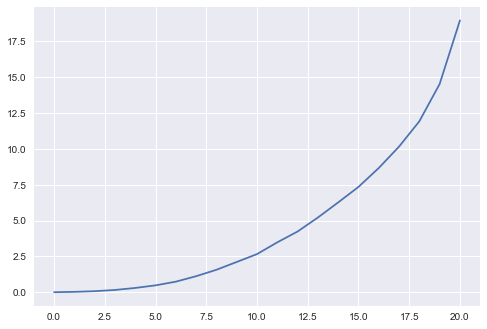

In [27]:
Hull=[]
for i in range(len(results)):
    Hull.append(results[i].index('Hull City')+1)
counts=[]
for i in range(21):
    counts.append(100*Hull.count(i)/250000)
plt.plot(counts)
plt.show()

In [28]:
counts

[0.0,
 0.0256,
 0.0724,
 0.1572,
 0.298,
 0.4784,
 0.736,
 1.1176,
 1.5656,
 2.1108,
 2.6596,
 3.48,
 4.236,
 5.2108,
 6.2652,
 7.3464,
 8.6656,
 10.1592,
 11.9252,
 14.5272,
 18.9632]

In [55]:
results[0].

['Manchester United',
 'Manchester City',
 'Newcastle United',
 'Tottenham Hotspur',
 'Swansea City',
 'Chelsea',
 'Reading',
 'Arsenal',
 'Aston Villa',
 'Liverpool',
 'Fulham',
 'West Bromwich Albion',
 'Everton',
 'Wigan Athletic',
 'Stoke City',
 'Sunderland',
 'Norwich City',
 'West Ham United',
 'Queens Park Rangers',
 'Southampton']

In [25]:
lik=0
for key in premdict:
    count=0
    for i in range(len(results)):
        if(results[i][premdict[key]]==key):
            count+=1
    print([key, i+1, 100*count/250000])
    lik+=np.log(count/250000)
lik

['Chelsea', 250000, 11.346]
['Tottenham Hotspur', 250000, 12.1184]
['Manchester City', 250000, 13.4008]
['Liverpool', 250000, 9.4188]
['Arsenal', 250000, 8.5848]
['Manchester United', 250000, 8.544]
['Everton', 250000, 5.9052]
['Southampton', 250000, 8.2744]
['AFC Bournemouth', 250000, 3.0236]
['West Bromwich Albion', 250000, 5.1376]
['West Ham United', 250000, 7.6212]
['Leicester City', 250000, 3.852]
['Stoke City', 250000, 7.448]
['Crystal Palace', 250000, 7.4476]
['Swansea City', 250000, 7.0756]
['Burnley', 250000, 7.5096]
['Watford', 250000, 9.698]
['Hull City', 250000, 11.9252]
['Middlesbrough', 250000, 10.5596]
['Sunderland', 250000, 9.7316]


-50.663349615002168

In [2]:
lik=0
for key in premdict:
    count=0
    for i in range(len(results)):
        if(results[i][premdict[key]]==key):
            count+=1

    lik+=np.log(count/250000)
lik

NameError: name 'premdict' is not defined

In [4]:
masterresults=[]
nSims=100000
for i in range(2009, 2017, 1):
    masterresults.append([i, storedresults(i, nSims)])

NameError: name 'storedresults' is not defined

NameError: name 'g' is not defined

In [32]:
champset.sort()
cumchamps=[]
cumulative=0
fourset.sort()
for i in range(len(champset)):
    cumulative=cumulative+fourset[i]
    cumchamps.append(cumulative)

In [33]:
cumchamps

[0.5532,
 1.6604,
 2.8440000000000003,
 4.198,
 5.6444,
 7.3588000000000005,
 9.618400000000001,
 13.456800000000001,
 19.0704,
 25.7796,
 33.8476,
 44.5796,
 64.7708,
 97.58919999999999,
 130.6888,
 176.7876,
 223.50639999999999,
 273.77959999999996,
 334.90599999999995,
 399.99999999999994]